In [100]:
import sys
import traceback
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import xarray as xr
import scipy.stats as stats
from metpy.cbook import get_test_data
import netCDF4 as nc  

import pyOptimalEstimation as pyOE

%matplotlib inline
sns.set(style='ticks', palette='deep')


sys.path.append('lib')
import nonScatMWRadTran
import supporting_routines

In [101]:
prior = xr.open_dataset("E:/SAMEER/pyOptimalEstimation_examples-master/pyOptimalEstimation_examples-master/data/BHOPAL_IGRA.nc", engine='netcdf4')
prior

<xarray.Dataset>
Dimensions:   (time: 8799, height: 20)
Coordinates:
  * time      (time) datetime64[ns] 2083-05-02T10:00:00 ... 2084-04-30T09:00:00
  * height    (height) float64 0.0 194.9 539.0 ... 7.646e+03 7.815e+03 7.855e+03
Data variables:
    temp      (time, height) float64 ...
    q         (time, height) float64 ...
    bar_pres  (time, height) float64 ...

In [102]:
prior.bar_pres

<xarray.DataArray 'bar_pres' (time: 8799, height: 20)>
[175980 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 2083-05-02T10:00:00 ... 2084-04-30T09:00:00
  * height   (height) float64 0.0 194.9 539.0 ... 7.646e+03 7.815e+03 7.855e+03
Attributes:
    long_name:  Pressure in Pa
    units:      Pa

In [103]:


import pandas as pd

# Assuming new_df is your DataFrame with a column named 'time'

# Convert the DataFrame to a table format
# table1 = pd.DataFrame({'time': prior['time']})
table1= pd.DataFrame (prior.bar_pres)

# Display the table

print(table1)
table1

           0        1        2        3        4        5        6        7   \
0     95600.0  92500.0  85000.0  70000.0  50000.0  40000.0  30000.0      NaN   
1     95500.0  92500.0  92200.0  85600.0  85000.0  76200.0  70000.0  64400.0   
2     92500.0  85900.0  85000.0  83000.0  71200.0  70000.0  63000.0  60000.0   
3     95600.0  92500.0  85000.0  70000.0  50000.0  40000.0  30000.0      NaN   
4     95400.0  92500.0  92200.0  85000.0  83200.0  80400.0  77400.0  74800.0   
...       ...      ...      ...      ...      ...      ...      ...      ...   
8794  95400.0  92900.0  92500.0  90900.0  85000.0  78200.0  71500.0  70200.0   
8795  95300.0  92500.0  85000.0  70000.0  50000.0  40000.0  30000.0      NaN   
8796  95300.0  92500.0  91100.0  85000.0  70000.0  68300.0  65600.0  62500.0   
8797  95400.0  92500.0      NaN      NaN      NaN      NaN      NaN      NaN   
8798  95500.0  92500.0  88200.0  85000.0  71500.0  70000.0  66800.0  65900.0   

           8        9        10       1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,95600.0,92500.0,85000.0,70000.0,50000.0,40000.0,30000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,95500.0,92500.0,92200.0,85600.0,85000.0,76200.0,70000.0,64400.0,60000.0,57800.0,51300.0,50000.0,48500.0,40000.0,33600.0,NaN,NaN,NaN,NaN,NaN
2,92500.0,85900.0,85000.0,83000.0,71200.0,70000.0,63000.0,60000.0,58600.0,52000.0,50000.0,49400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,95600.0,92500.0,85000.0,70000.0,50000.0,40000.0,30000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,95400.0,92500.0,92200.0,85000.0,83200.0,80400.0,77400.0,74800.0,70000.0,62700.0,62000.0,60000.0,52300.0,50000.0,45900.0,40000.0,36300.0,30000.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8794,95400.0,92900.0,92500.0,90900.0,85000.0,78200.0,71500.0,70200.0,70000.0,69800.0,69400.0,67800.0,66900.0,66200.0,63000.0,55600.0,54200.0,50000.0,46400.0,40000.0
8795,95300.0,92500.0,85000.0,70000.0,50000.0,40000.0,30000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8796,95300.0,92500.0,91100.0,85000.0,70000.0,68300.0,65600.0,62500.0,58900.0,58300.0,54800.0,51400.0,50000.0,40000.0,30000.0,27100.0,NaN,NaN,NaN,NaN
8797,95400.0,92500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


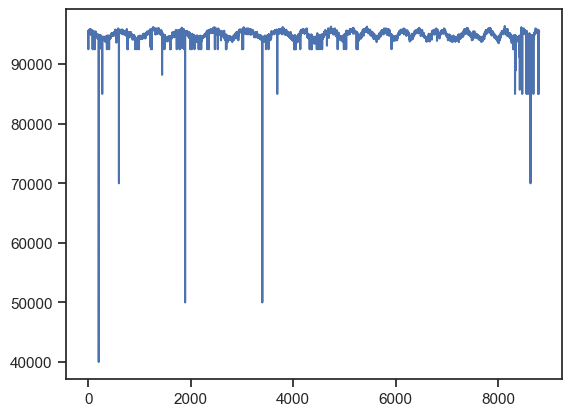

In [104]:
plt.plot(table1[0])

In [105]:
prior.q

<xarray.DataArray 'q' (time: 8799, height: 20)>
[175980 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 2083-05-02T10:00:00 ... 2084-04-30T09:00:00
  * height   (height) float64 0.0 194.9 539.0 ... 7.646e+03 7.815e+03 7.855e+03
Attributes:
    long_name:  Relative humidity
    units:      %

In [106]:
prior.temp

<xarray.DataArray 'temp' (time: 8799, height: 20)>
[175980 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 2083-05-02T10:00:00 ... 2084-04-30T09:00:00
  * height   (height) float64 0.0 194.9 539.0 ... 7.646e+03 7.815e+03 7.855e+03
Attributes:
    long_name:  temperature
    units:      K

In [107]:
import pandas as pd

# Specify the path to your CSV file with escaped backslashes
csv_file_path = "C:\\Users\\angsh\\Downloads\\BHOPAL_IGRA_DATES.csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

# Display the DataFrame
print(df)


             Test_time        SH
0     01-01-2000 00:00       NaN
1     01-01-2000 12:00       NaN
2     02-01-2000 00:00       NaN
3     03-01-2000 00:00       NaN
4     03-01-2000 11:00       NaN
...                ...       ...
8794  29-11-2023 00:00  0.085046
8795  29-11-2023 12:00       NaN
8796  30-11-2023 00:00       NaN
8797  30-11-2023 12:00       NaN
8798  01-12-2023 00:00  0.378090

[8799 rows x 2 columns]


In [108]:
import pandas as pd
import xarray as xr

# Read the CSV file into a pandas DataFrame
csv_file_path = "C:\\Users\\angsh\\Downloads\\BHOPAL_IGRA_DATES.csv"
df = pd.read_csv(csv_file_path)

# Convert the 'Test_time' column to datetime64
df['Test_time'] = pd.to_datetime(df['Test_time'], format='%d-%m-%Y %H:%M')

# Assuming you have already loaded your data into prior
# prior: xarray.Dataset

# Make sure that df is sorted by 'Test_time'
df = df.sort_values(by='Test_time')

# If 'time' is already a coordinate in prior and you want to replace its values,
# you can use the .assign_coords() method instead of direct assignment:
prior = prior.assign_coords(time=df['Test_time'])
# prior = prior.assign_coords(time=df.index)
prior = prior.assign_coords(height=prior.height)


# Now the 'time' coordinate in prior has been replaced with the 'Test_time' values from df
prior

<xarray.Dataset>
Dimensions:   (time: 8799, height: 20)
Coordinates:
  * time      (time) datetime64[ns] 2000-01-01 ... 2023-12-01
  * height    (height) float64 0.0 194.9 539.0 ... 7.646e+03 7.815e+03 7.855e+03
Data variables:
    temp      (time, height) float64 ...
    q         (time, height) float64 ...
    bar_pres  (time, height) float64 9.56e+04 9.25e+04 ... 4.28e+04 4.2e+04

In [109]:
import pandas as pd

# Assuming new_df is your DataFrame with a column named 'time'

# Convert the DataFrame to a table format
table = pd.DataFrame({'time': prior['time']})

# Display the table

print(table)
table

                    time
0    2000-01-01 00:00:00
1    2000-01-01 12:00:00
2    2000-01-02 00:00:00
3    2000-01-03 00:00:00
4    2000-01-03 11:00:00
...                  ...
8794 2023-11-29 00:00:00
8795 2023-11-29 12:00:00
8796 2023-11-30 00:00:00
8797 2023-11-30 12:00:00
8798 2023-12-01 00:00:00

[8799 rows x 1 columns]


,time
0,2000-01-01 00:00:00
1,2000-01-01 12:00:00
2,2000-01-02 00:00:00
3,2000-01-03 00:00:00
4,2000-01-03 11:00:00
...,...
8794,2023-11-29 00:00:00
8795,2023-11-29 12:00:00
8796,2023-11-30 00:00:00
8797,2023-11-30 12:00:00


In [110]:
prior.time

<xarray.DataArray 'time' (time: 8799)>
array(['2000-01-01T00:00:00.000000000', '2000-01-01T12:00:00.000000000',
       '2000-01-02T00:00:00.000000000', ..., '2023-11-30T00:00:00.000000000',
       '2023-11-30T12:00:00.000000000', '2023-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-01T12:00:00 ... 2023-12-01

In [111]:
prior.q

<xarray.DataArray 'q' (time: 8799, height: 20)>
[175980 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-01T12:00:00 ... 2023-12-01
  * height   (height) float64 0.0 194.9 539.0 ... 7.646e+03 7.815e+03 7.855e+03
Attributes:
    long_name:  Relative humidity
    units:      %

In [112]:
# import pandas as pd

# # Assuming 'table' is your DataFrame with a column named 'time'

# # Step 1: Get unique dates
# unique_dates = table['time'].unique()

# # Step 2: Randomly select 5 unique dates
# random_dates = pd.Series(unique_dates).sample(n=8, random_state=42)  # Set random_state for reproducibility

# print(random_dates)


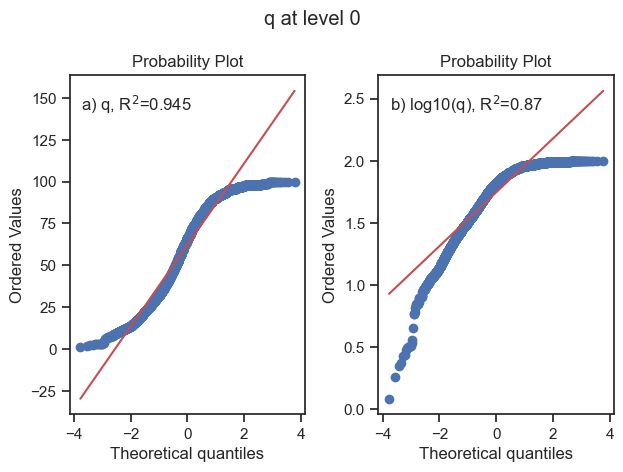

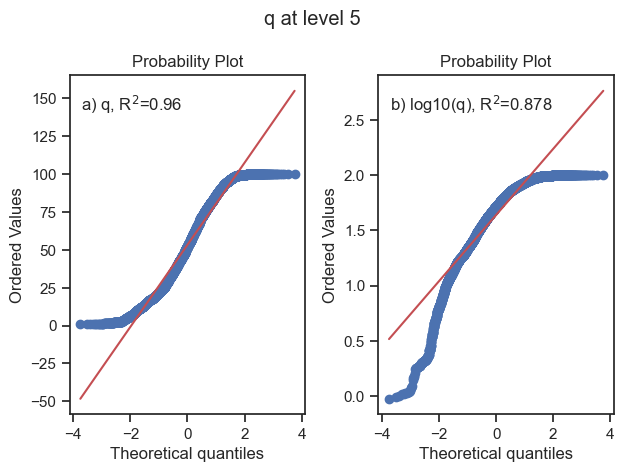

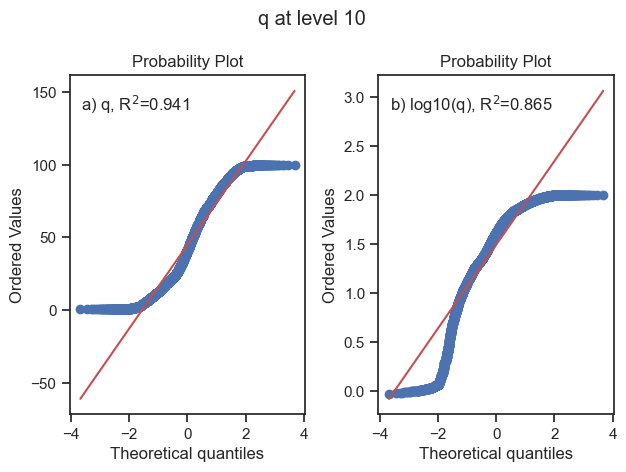

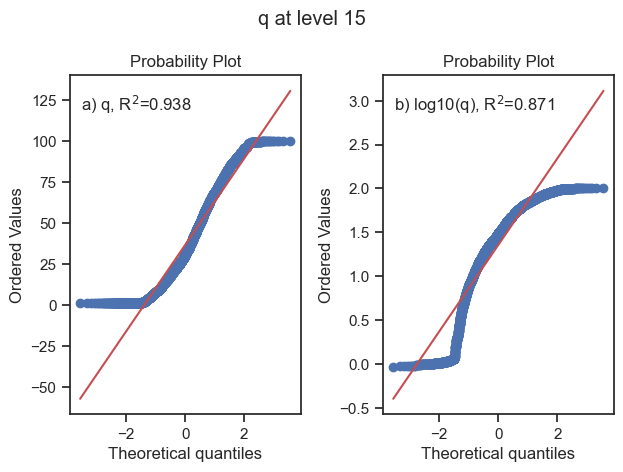

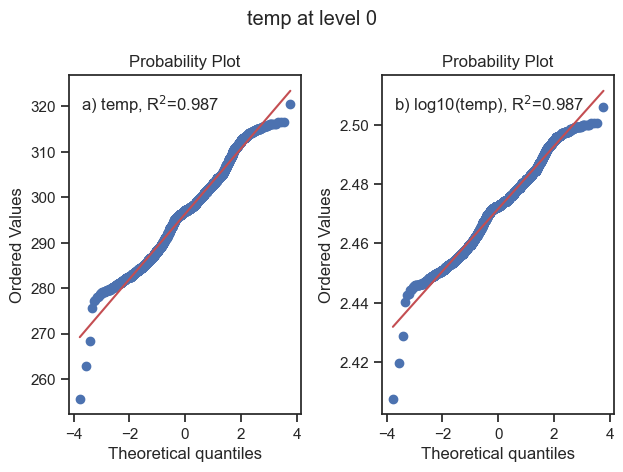

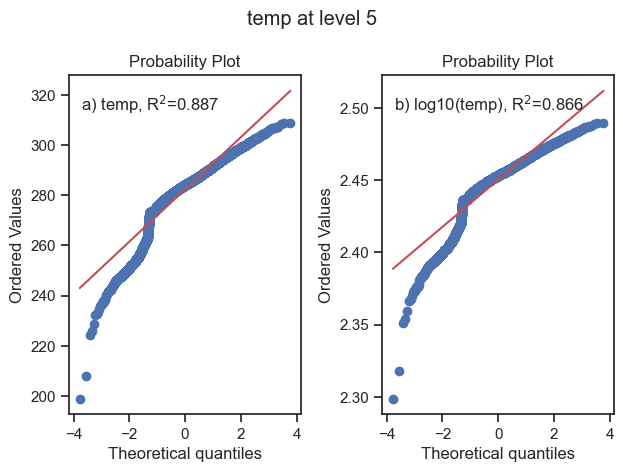

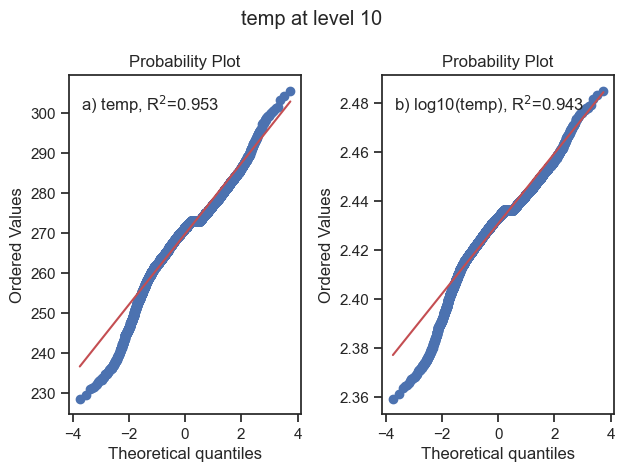

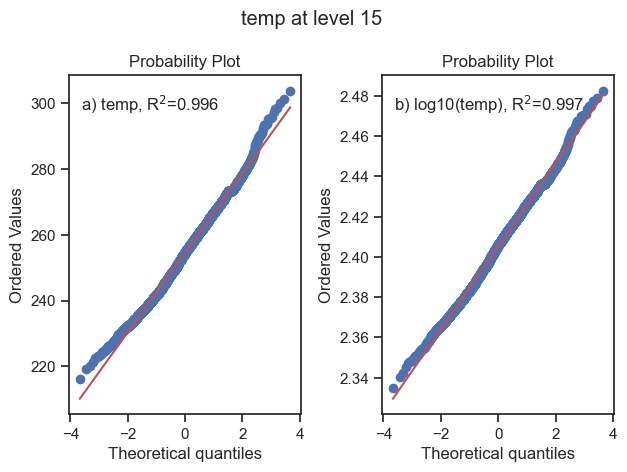

In [113]:
for var in ['q', 'temp']:
    for h in range(0, 20, 5):
        fig, (ax, ax1) = plt.subplots(ncols=2)
        plt.suptitle('%s at level %i' % (var,h))
        (osm, osr), (slope, intercept, r) = stats.probplot(
            prior[var].isel(height=h).dropna('time').values,
            dist="norm",
            plot=ax,
            fit=True,
            rvalue=False)
        ax.text(
            0.05,
            0.95,
            '%s) %s, R$^2$=%.3g' % ('a', var, r**2),
            horizontalalignment='left',
            verticalalignment='top',
            transform=ax.transAxes)

        (osm, osr), (slope, intercept, r) = stats.probplot(
            np.log10(prior[var].isel(height=h).dropna('time').values),
            dist="norm",
            plot=ax1,
            fit=True,
            rvalue=False)
        ax1.text(
            0.05,
            0.95,
            '%s) %s, R$^2$=%.3g' % ('b', 'log10(%s)'%var, r**2),
            horizontalalignment='left',
            verticalalignment='top',
            transform=ax1.transAxes)
        fig.tight_layout()

In [114]:
import numpy as np
import pandas as pd

# Assuming 'prior' is your pandas DataFrame
prior['q'] = np.log10(prior['q'])



In [115]:
prior['q']

<xarray.DataArray 'q' (time: 8799, height: 20)>
array([[1.76378602, 1.49879674, 1.54344486, ...,        nan,        nan,
               nan],
       [1.58346772, 1.25124114, 1.21546669, ...,        nan,        nan,
               nan],
       [1.46541405, 1.24228312, 1.06260911, ...,        nan,        nan,
               nan],
       ...,
       [1.964111  , 1.94255719, 1.92055124, ...,        nan,        nan,
               nan],
       [1.97897247, 1.87270156,        nan, ...,        nan,        nan,
               nan],
       [1.97825928, 1.96708761, 1.92006116, ..., 1.20774371, 1.5831737 ,
        1.16409152]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-01T12:00:00 ... 2023-12-01
  * height   (height) float64 0.0 194.9 539.0 ... 7.646e+03 7.815e+03 7.855e+03
Attributes:
    long_name:  Relative humidity
    units:      %

In [116]:
profileTT = np.array([
    '2018-07-31T00:00:00.000000000', '2007-06-12T00:00:00.000000000',
    '2023-09-27T00:00:00.000000000', '2012-12-04T00:00:00.000000000',
     ],dtype='datetime64[ns]')
profiles = prior.sel(time=profileTT)
prior = prior.drop_sel(time=profileTT)
nLev = len(prior.height)
nLev

# 02-02-2000 00:00
# 02-02-2000 12:00
# 03-02-2000 00:00
# 03-02-2000 12:00
# 04-02-2000 00:00
# 04-02-2000 12:00
# 05-02-2000 00:00
# 05-02-2000 12:00

#    2008-10-14 00:00:00
#   2004-05-29 12:00:00
#   2015-09-21 12:00:00
#   2000-07-22 12:00:00
#    2000-06-13 12:00:00
#      2018-03-10 12:00:00
# 2008-08-14 12:00:00 

# '2008-08-14T12:00:00.000000000',


# profileTT = np.array([
#     '2017-12-21T12:00:00.000000000', '2004-05-23T00:00:00.000000000',
#    '2001-06-06T12:00:00.000000000', '2011-11-03T00:00:00.000000000',
#      ],dtype='datetime64[ns]')

20

In [117]:
priors = {'all': prior}

seasons = [
    'DJF',
    'MAM',
    'JJA',
    'SON',
]
months = (
    [12, 1, 2],
    [3, 4, 5],
    [6, 7, 8],
    [9, 10, 11],
)
for season, month in zip(seasons, months):
    priors[season] = prior.where(
        np.in1d(prior['time.month'], month)[:, np.newaxis]).dropna(
            'time', how='all')

In [118]:
# prior_qts = {}
# for season in priors.keys():
#     prior_q = priors[season]['q'].to_pandas()
#     prior_q.columns = ['%05i_q' % (i) for i in prior_q.columns]
#     prior_t = priors[season]['temp'].to_pandas()
#     prior_t.columns = ['%05i_t' % (i) for i in prior_t.columns]
#     prior_qts[season] = pd.concat((prior_q, prior_t), axis=1)
#     prior_qts[season] = prior_qts[season].reindex(
#         sorted(prior_qts[season].columns), axis=1)

# prior_qts

prior_qts = {}
for season in priors.keys():
    prior_q = priors[season]['q'].to_pandas()
    prior_q.columns = ['%05i_q' % (i) for i in prior_q.columns]
    prior_t = priors[season]['temp'].to_pandas()
    prior_t.columns = ['%05i_t' % (i) for i in prior_t.columns]
    prior_qts[season] = pd.concat((prior_q, prior_t), axis=1)
    prior_qts[season] = prior_qts[season].reindex(
        sorted(prior_qts[season].columns), axis=1)

prior_qts

{'all':                       00000_q  00000_t   00194_q  00194_t   00539_q  00539_t  \
 time                                                                           
 2000-01-01 00:00:00  1.763786   285.15  1.498797   289.95  1.543445   284.95   
 2000-01-01 12:00:00  1.583468   296.55  1.251241   292.15  1.215467   291.75   
 2000-01-02 00:00:00  1.465414   289.55  1.242283   285.15  1.062609   284.95   
 2000-01-03 00:00:00  1.913394   281.15  1.324761   287.55       NaN   287.15   
 2000-01-03 11:00:00  1.544090   293.75  1.212293   291.25  1.176503   290.95   
 ...                       ...      ...       ...      ...       ...      ...   
 2023-11-29 00:00:00  1.928304   291.15  1.958430   289.95  1.958494   290.15   
 2023-11-29 12:00:00  1.923284   296.75  1.888359   293.55  1.957780   287.95   
 2023-11-30 00:00:00  1.964111   290.35  1.942557   291.95  1.920551   292.15   
 2023-11-30 12:00:00  1.978972   296.55  1.872702   294.55       NaN      NaN   
 2023-12-01 00:00:00 

In [119]:
x_cov = []
x_mean = []

for season in ['all'] + seasons:

    x_cov1 = prior_qts[season].cov().rename_axis('state', axis=0).rename_axis('stateT', axis=1)
    x_mean1 = prior_qts[season].mean().rename_axis('state', axis=0)

    x_cov.append(xr.DataArray(x_cov1))
    x_mean.append(xr.DataArray(x_mean1))

x_cov = xr.concat(x_cov, dim='season')
x_mean = xr.concat(x_mean, dim='season')

x_cov['season'] = ['all'] + seasons
x_mean['season'] = ['all'] + seasons

In [120]:
for season in x_cov.season:
    assert np.linalg.matrix_rank(x_cov.sel(season=season).to_pandas()) ==  x_cov.shape[-1]

Text(0, 0.5, 'Height [m]')

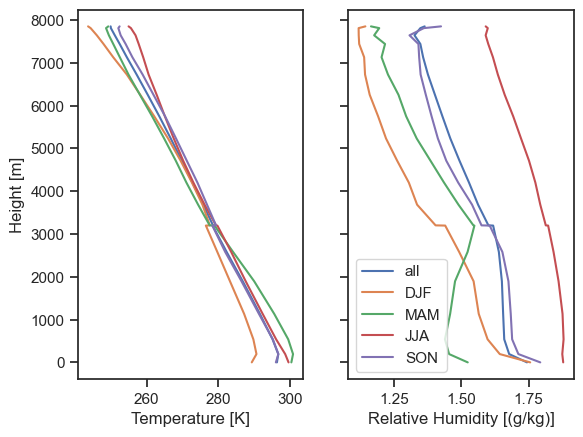

In [121]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
for season in ['all'] + seasons:
    t, q = supporting_routines.splitTQ(x_mean.sel(season=season).to_pandas())
    ax1.plot(t, t.index, label=season)
    ax2.plot(q, q.index, label=season)

ax2.legend()
ax1.set_xlabel('Temperature [K]')
ax2.set_xlabel('Relative Humidity [(g/kg)]')
ax1.set_ylabel('Height [m]')

Text(0.5, 1.0, '$\\mathbb{S}_{a}$ Humidity')

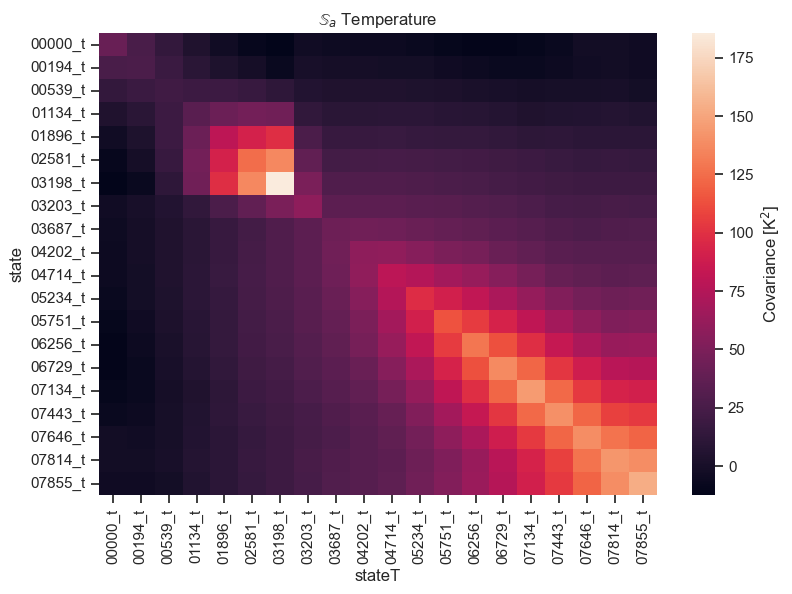

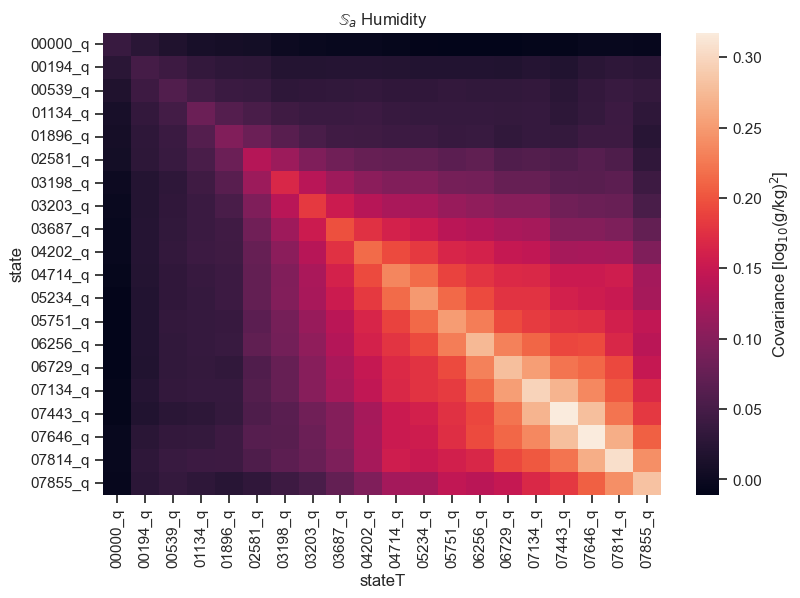

In [122]:
S_a = x_cov.sel(season='DJF').to_pandas()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(S_a.iloc[1::2, 1::2], ax=ax, cbar_kws={'label':'Covariance [K$^2$]'})
ax.set_title('$\mathbb{S}_{a}$ Temperature')
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(S_a.iloc[::2, ::2], ax=ax, cbar_kws={'label':'Covariance [log$_{10}$(g/kg)$^2$]'})
ax.set_title('$\mathbb{S}_{a}$ Humidity')

In [123]:
height = priors['all'].height

pressure = []
for k in ['all'] + seasons:
    pressure.append(priors[k].bar_pres.mean('time'))
pressure = xr.concat(pressure, dim='season')
pressure['season'] = ['all'] + seasons
pressure = pressure.to_pandas()
pressure

height,0.000000,194.922456,539.012255,1134.632944,1896.844351,2581.096462,3198.768091,3203.262060,3687.155223,4202.306033,4714.098865,5234.892589,5751.334358,6256.685453,6729.239678,7134.907504,7443.648937,7646.201019,7814.739305,7855.378898
season,,,,,,,,,,,,,,,,,,,,
all,94909.948835,92824.479581,89287.504268,83522.351465,76880.623710,71215.155007,66464.747781,65477.460843,61778.684953,58090.486640,54607.578534,51226.005075,48012.567474,45010.313316,42318.617021,40090.275357,38453.322429,37396.565759,36582.887002,36463.096310
DJF,95474.608448,93121.642145,90134.045584,84941.103711,78892.560801,73904.406130,69504.309927,69142.055085,65710.171306,61885.329018,58111.982571,54242.722745,50399.260523,46762.257496,43447.476636,40330.481283,38046.844106,36608.716026,35346.007151,34786.415712
MAM,94819.215686,92777.892157,89684.460784,84231.909671,77715.982187,71604.624565,66472.292191,64767.895879,61216.322089,57661.399672,54400.944969,51044.809983,47778.132251,44684.592145,41897.041801,39943.522562,38467.447917,37637.995595,37198.260870,37717.327766
JJA,94256.463794,92410.182303,87824.777580,81391.960697,74178.491244,68251.965657,63256.900504,61720.820821,57612.607161,53884.944049,50613.871636,47712.692512,45103.236607,42811.210495,40781.357049,39367.969349,38230.402930,37448.526077,36516.807910,36060.338346
SON,95104.505632,92991.774530,89578.186377,83665.537432,76927.050905,71282.452431,66766.780969,66370.277909,62701.987695,59052.001907,55405.209841,51955.506391,48741.363403,45680.333154,43005.484247,40592.450416,39025.150150,37932.495345,37382.787879,37526.333333


In [124]:
import numpy as np
import pandas as pd

#Assuming profiles is an xarray Dataset or DataArray
profiles_t = profiles['temp'].to_pandas()
profiles_t
# # Proceed with the rest of the code as before
profiles_t.columns = ['%05i_t' % (i) for i in profiles_t.columns]
profiles_q = profiles['q'].to_pandas()
profiles_q.columns = ['%05i_q' % (i) for i in profiles_q.columns]
x_truths = pd.concat((profiles_t, profiles_q), axis=1)
x_truths = x_truths.reindex(sorted(x_truths.index), axis=0)
x_truths.columns.name = 'state'
x_truths.index.name = 'time'

# assert np.all(np.isfinite(x_truths))
x_truths



# import numpy as np
# import pandas as pd

# profiles_t = profiles['temp'].to_pandas()
# profiles_t.columns = ['%05i_t' % (i) for i in profiles_t.columns]
# profiles_q = profiles['q'].to_pandas()
# profiles_q.columns = ['%05i_q' % (i) for i in profiles_q.columns]

# x_truths = pd.concat((profiles_t, profiles_q), axis=1)
# x_truths = x_truths.reindex(sorted(x_truths.index), axis=0)
# # x_truths = np.nan_to_num(x_truths) 
# x_truths
# x_truths.columns.name = 'state'
# x_truths.index.name = 'time'

# # Replace missing values with mean
# x_truths_filled = x_truths.fillna(x_truths.mean())

# # Check for infinite values
# infinite_values = not np.all(np.isfinite(x_truths_filled.values))
# print("Infinite Values Present after filling missing values:", infinite_values)

# # Ensure all values are finite
# assert np.all(np.isfinite(x_truths_filled)), "Not all values are finite after filling missing values"

# # Now x_truths_filled can be used without any infinite or missing values

# # assert np.all(np.isfinite(x_truths))
# x_truths

state,00000_t,00194_t,00539_t,01134_t,01896_t,02581_t,03198_t,03203_t,03687_t,04202_t,...,04714_q,05234_q,05751_q,06256_q,06729_q,07134_q,07443_q,07646_q,07814_q,07855_q
time,,,,,,,,,,,,,,,,,,,,,
2007-06-12,302.75,303.75,302.75,299.75,299.75,298.55,297.35,294.95,292.95,290.75,...,1.499594,1.426032,1.502124,1.524393,1.747560,1.032378,0.922112,1.005073,0.988310,1.218707
2012-12-04,287.15,290.55,292.35,291.95,289.55,290.35,287.15,282.55,275.75,274.75,...,0.799520,0.839357,0.922743,1.080645,1.228389,1.399173,1.756992,1.149040,0.623835,1.132177
2018-07-31,297.15,296.95,294.35,295.15,293.35,293.35,284.55,283.35,287.55,287.75,...,1.616298,1.766029,1.870518,1.864084,1.641978,1.869308,1.740771,1.887507,1.603106,1.529335
2023-09-27,298.15,299.55,299.15,293.55,292.95,292.95,289.55,289.35,287.95,287.55,...,1.587068,1.762653,1.846702,1.679668,1.360764,0.894041,1.253721,1.468422,0.794161,0.636621


In [125]:
# x_truths_filled = x_truths.interpolate(method='linear', axis=1, limit_direction='both')  # Interpolate NaN values along columns using linear interpolation
# # print(x_truths_filled)
# x_truths=x_truths_filled
# x_truths

assert np.all(np.isfinite(x_truths))
x_truths

state,00000_t,00194_t,00539_t,01134_t,01896_t,02581_t,03198_t,03203_t,03687_t,04202_t,...,04714_q,05234_q,05751_q,06256_q,06729_q,07134_q,07443_q,07646_q,07814_q,07855_q
time,,,,,,,,,,,,,,,,,,,,,
2007-06-12,302.75,303.75,302.75,299.75,299.75,298.55,297.35,294.95,292.95,290.75,...,1.499594,1.426032,1.502124,1.524393,1.747560,1.032378,0.922112,1.005073,0.988310,1.218707
2012-12-04,287.15,290.55,292.35,291.95,289.55,290.35,287.15,282.55,275.75,274.75,...,0.799520,0.839357,0.922743,1.080645,1.228389,1.399173,1.756992,1.149040,0.623835,1.132177
2018-07-31,297.15,296.95,294.35,295.15,293.35,293.35,284.55,283.35,287.55,287.75,...,1.616298,1.766029,1.870518,1.864084,1.641978,1.869308,1.740771,1.887507,1.603106,1.529335
2023-09-27,298.15,299.55,299.15,293.55,292.95,292.95,289.55,289.35,287.95,287.55,...,1.587068,1.762653,1.846702,1.679668,1.360764,0.894041,1.253721,1.468422,0.794161,0.636621


In [126]:
# def forwardRT(X, pressure=None, zenithAngle=0, frequencies=[]):
#     # Convert X to a pandas DataFrame or Series object if it's a numpy array
#     if isinstance(X, np.ndarray):
#         X = pd.Series(X, index=[f'{i}_t' for i in pd.date_range(start='2015-09-21T12:00:00.000000000', periods=len(X), freq='D')])

#     # X contains T and Q, lets split the vector
#     t_index, q_index = supporting_routines.splitTQ(X)
#     # humidity is in log10 scale, convert to linear in kg/kg
#     temperature, humidity = supporting_routines.splitTQ(X)
#     humidity = (10**humidity) / 1000.  # Assign humidity before using it
#     # Height in meters comes from index of the temperature (or humidity) vector
#     heights = temperature.index
#     assert np.all(np.diff(heights) > 0)

#     # get absolute humidity from specific humidity
#     abs_humidity = supporting_routines.q2a(humidity, pressure, temperature)
    
#     # run the forward operator
#     TB, tau, tau_wv, tau_o2 = nonScatMWRadTran.STP_IM10(
#         heights,  # [m]  
#         temperature,  # [K]
#         pressure,  # [Pa]
#         abs_humidity,  # [kgm^-3]
#         zenithAngle,  # zenith angle of observation in deg.
#         frequencies,  # frequency vector in GHz
#     )
#     return TB


In [127]:
def forwardRT(X, pressure=None, zenithAngle=0, frequencies=[]):

    # X contains T and Q, lets split the vector
    temperature, humidity = supporting_routines.splitTQ(X)
    # humdity is in log10 scale, convert to linear in kg/kg
#     humidity = (10**humidity) / 1000.
    # Height in meters comes from index of the temperature (or humidty) vector
    heights = temperature.index
    assert np.all(np.diff(heights) > 0)

    # get absolute humidty from specific humdity
    abs_humidity = supporting_routines.q2a(humidity, pressure, temperature)
    
    # run the forward operator
    TB, tau, tau_wv, tau_o2 = nonScatMWRadTran.STP_IM10(
        heights,  # [m]  
        temperature,  # [K]
        pressure,  # [Pa]
        abs_humidity,  # [kgm^-3]
        zenithAngle,  # zenith angle of observation in deg.
        frequencies,  # frequency vector in GHz
    )
    return TB

In [128]:
frequencies = [ 
   22.24, 23.04, 23.84, 25.44, 26.24, 27.84, 31.4, 51.26, 52.28, 53.86, 54.94,
    56.66, 57.3, 58.
]

# 22.23 
# 23.03 
# 23.83
# 26.23
# 30. 
# 51.25 
# 52.280
# 53.85
# 54.94 
# 56.66 
# 57.29
# 58.8
# 59.4 
# 60. 



In [129]:
y_vars = np.array(frequencies)
x_vars = x_mean.state.values
print('y_vars:\n', y_vars)
print('x_vars:\n', x_vars)

y_vars:
 [22.24 23.04 23.84 25.44 26.24 27.84 31.4  51.26 52.28 53.86 54.94 56.66
 57.3  58.  ]
x_vars:
 ['00000_q' '00000_t' '00194_q' '00194_t' '00539_q' '00539_t' '01134_q'
 '01134_t' '01896_q' '01896_t' '02581_q' '02581_t' '03198_q' '03198_t'
 '03203_q' '03203_t' '03687_q' '03687_t' '04202_q' '04202_t' '04714_q'
 '04714_t' '05234_q' '05234_t' '05751_q' '05751_t' '06256_q' '06256_t'
 '06729_q' '06729_t' '07134_q' '07134_t' '07443_q' '07443_t' '07646_q'
 '07646_t' '07814_q' '07814_t' '07855_q' '07855_t']


In [130]:
season = 'DJF'  #summer june july august
profile = np.datetime64('2012-12-04T00:00:00.000000000')
x_truth = x_truths.loc[profile]
x_truth

state
00000_t    287.150000
00194_t    290.550000
00539_t    292.350000
01134_t    291.950000
01896_t    289.550000
02581_t    290.350000
03198_t    287.150000
03203_t    282.550000
03687_t    275.750000
04202_t    274.750000
04714_t    273.350000
05234_t    273.150000
05751_t    264.450000
06256_t    257.650000
06729_t    253.850000
07134_t    253.250000
07443_t    247.450000
07646_t    249.450000
07814_t    247.050000
07855_t    241.650000
00000_q      1.885591
00194_q      1.802709
00539_q      1.718759
01134_q      1.688433
01896_q      1.465414
02581_q      1.033307
03198_q      1.043667
03203_q      0.694097
03687_q      1.292015
04202_q      0.977337
04714_q      0.799520
05234_q      0.839357
05751_q      0.922743
06256_q      1.080645
06729_q      1.228389
07134_q      1.399173
07443_q      1.756992
07646_q      1.149040
07814_q      0.623835
07855_q      1.132177
Name: 2012-12-04 00:00:00, dtype: float64

In [131]:
y_noise = pd.Series(
    [
        0.12026637, 0.10864162, 0.10412012, 0.0918477, 0.10174478, 0.10085633,
        0.10500476, 0.42303663, 0.45658514, 0.26291823, 0.25538793, 0.1773584,
        0.17556195, 0.59489495
    ],
    index=y_vars
)

S_y = pd.DataFrame(
    np.diag(y_noise.values**2),
    index=y_vars,
    columns=y_vars,
)


Text(0.5, 1.0, 'Measurement uncertainty $\\mathbf{S}_{y}$')

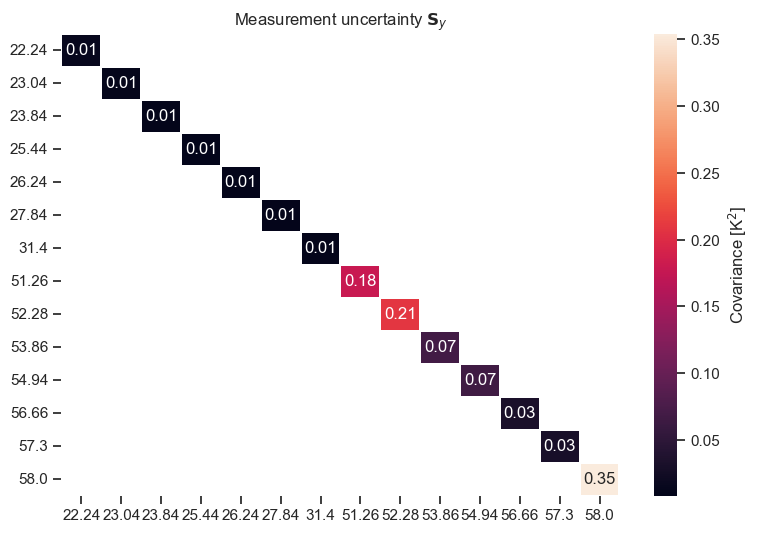

In [132]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(
    S_y.where(S_y > 0), 
    annot=True, 
    fmt='.2f', 
    ax=ax, 
    linewidths=.05, 
    cbar_kws={'label':'Covariance [K$^2$]'}
)
ax.set_title(r'Measurement uncertainty $\mathbf{S}_{y}$')

In [133]:
x_a = x_mean.sel(season='DJF').to_pandas()[x_vars]
S_a = x_cov.sel(season='DJF').to_pandas().loc[x_vars, x_vars]

In [134]:
singularMatrix = np.array([[1,0,0], [1,0,1e-50], [1,1e-50,0]])
np.linalg.inv(singularMatrix)

array([[ 1.e+00,  0.e+00,  0.e+00],
       [-1.e+50,  0.e+00,  1.e+50],
       [-1.e+50,  1.e+50,  0.e+00]])

In [135]:
x_truth

state
00000_t    287.150000
00194_t    290.550000
00539_t    292.350000
01134_t    291.950000
01896_t    289.550000
02581_t    290.350000
03198_t    287.150000
03203_t    282.550000
03687_t    275.750000
04202_t    274.750000
04714_t    273.350000
05234_t    273.150000
05751_t    264.450000
06256_t    257.650000
06729_t    253.850000
07134_t    253.250000
07443_t    247.450000
07646_t    249.450000
07814_t    247.050000
07855_t    241.650000
00000_q      1.885591
00194_q      1.802709
00539_q      1.718759
01134_q      1.688433
01896_q      1.465414
02581_q      1.033307
03198_q      1.043667
03203_q      0.694097
03687_q      1.292015
04202_q      0.977337
04714_q      0.799520
05234_q      0.839357
05751_q      0.922743
06256_q      1.080645
06729_q      1.228389
07134_q      1.399173
07443_q      1.756992
07646_q      1.149040
07814_q      0.623835
07855_q      1.132177
Name: 2012-12-04 00:00:00, dtype: float64

In [136]:
import pandas as pd

# Assuming 'series' is your pandas Series
has_nan = x_truth.isna().any()

# Print whether there are NaN values
print("Are there any NaN values in the series?", has_nan)


Are there any NaN values in the series? False


In [137]:
try:
    pyOE.invertMatrix(singularMatrix)
except Exception as err:
    traceback.print_tb(err.__traceback__)

  File "C:\Users\angsh\AppData\Local\Temp\ipykernel_7872\384370707.py", line 2, in <module>
    pyOE.invertMatrix(singularMatrix)
  File "C:\Users\angsh\anaconda3\envs\pyvenv\lib\site-packages\pyOptimalEstimation\pyOEcore.py", line 1485, in invertMatrix
    raise ValueError("Found singular matrix", UserWarning)


In [138]:
forwardKwArgs = dict(
    pressure=pressure.loc['JJA'].values,
    zenithAngle=0,
    frequencies=frequencies
)

In [139]:
x_truth

state
00000_t    287.150000
00194_t    290.550000
00539_t    292.350000
01134_t    291.950000
01896_t    289.550000
02581_t    290.350000
03198_t    287.150000
03203_t    282.550000
03687_t    275.750000
04202_t    274.750000
04714_t    273.350000
05234_t    273.150000
05751_t    264.450000
06256_t    257.650000
06729_t    253.850000
07134_t    253.250000
07443_t    247.450000
07646_t    249.450000
07814_t    247.050000
07855_t    241.650000
00000_q      1.885591
00194_q      1.802709
00539_q      1.718759
01134_q      1.688433
01896_q      1.465414
02581_q      1.033307
03198_q      1.043667
03203_q      0.694097
03687_q      1.292015
04202_q      0.977337
04714_q      0.799520
05234_q      0.839357
05751_q      0.922743
06256_q      1.080645
06729_q      1.228389
07134_q      1.399173
07443_q      1.756992
07646_q      1.149040
07814_q      0.623835
07855_q      1.132177
Name: 2012-12-04 00:00:00, dtype: float64

In [140]:
# forwardKwArgs = dict(
#     pressure=pressure.loc['SON'].values,
#     zenithAngle=0,
#     frequencies=frequencies
# )

y_obs = forwardRT(x_truth, **forwardKwArgs)
y_obs = pd.Series(y_obs, index=y_vars)
assert np.all(np.isfinite(y_obs))

In [141]:
oe_ref = pyOE.optimalEstimation(
    x_vars,       # state variable names
    x_a,          # a priori
    S_a,          # a priori uncertainty
    y_vars,       # measurement variable names
    y_obs,        # observations
    S_y,      # observation uncertainty
    forwardRT,    # forward Operator
    forwardKwArgs=forwardKwArgs,  # additional function arguments
    x_truth=x_truth,              # true profile
)


In [142]:
oe_ref.doRetrieval()

0.40 s, iteration 1, degrees of freedom: 2.01 of 40, converged (x-space):  0.406
0.60 s, iteration 2, degrees of freedom: 2.01 of 40, done.  0.000


True

In [143]:
print(oe_ref.x_op[:10])
print(oe_ref.S_op[:10])

00000_q      1.810907
00000_t    287.145612
00194_q      1.656361
00194_t    290.423834
00539_q      1.589513
00539_t    290.110367
01134_q      1.549412
01134_t    287.853715
01896_q      1.526896
01896_t    284.219483
dtype: float64
          00000_q   00000_t   00194_q   00194_t   00539_q    00539_t  \
00000_q  0.017455  0.000361  0.014612  0.022073  0.013254   0.066457   
00000_t  0.000361  0.011618  0.001540 -0.034215  0.001688   0.001252   
00194_q  0.014612  0.001540  0.041705  0.037008  0.038384   0.070433   
00194_t  0.022073 -0.034215  0.037008  0.173888  0.033208  -0.020320   
00539_q  0.013254  0.001688  0.038384  0.033208  0.054902   0.046510   
00539_t  0.066457  0.001252  0.070433 -0.020320  0.046510   8.584527   
01134_q  0.010968  0.001661  0.032295  0.026016  0.045256   0.105828   
01134_t  0.131608  0.019695  0.199100  0.022728  0.154649  11.212516   
01896_q  0.011284  0.001773  0.029296  0.022896  0.037911   0.148152   
01896_t  0.171510  0.039523  0.299581  0.0053

In [144]:
print(oe_ref.x_op_err[:10])

00000_q    0.132116
00000_t    0.107788
00194_q    0.204218
00194_t    0.416999
00539_q    0.234313
00539_t    2.929936
01134_q    0.278729
01134_t    5.288743
01896_q    0.307833
01896_t    8.692227
dtype: float64


In [145]:
print('total', oe_ref.dgf)
print(oe_ref.dgf_x[:10])

total 2.0070452798693204
00000_q   -1.636521e-04
00000_t    9.956830e-01
00194_q    1.044086e-02
00194_t    9.553189e-01
00539_q    7.086392e-06
00539_t    4.546087e-02
01134_q    1.592337e-06
01134_t    2.964687e-04
01896_q    2.167089e-09
01896_t    2.087124e-07
dtype: float64


In [146]:
help(oe_ref)

Help on optimalEstimation in module pyOptimalEstimation.pyOEcore object:

class optimalEstimation(builtins.object)
 |  optimalEstimation(x_vars, x_a, S_a, y_vars, y_obs, S_y, forward, userJacobian=None, x_truth=None, b_vars=[], b_p=[], S_b=[[]], x_lowerLimit={}, x_upperLimit={}, useFactorInJac=False, gammaFactor=None, perturbation=0.1, disturbance=None, convergenceFactor=10, convergenceTest='x', forwardKwArgs={}, multipleForwardKwArgs=None, verbose=None)
 |  
 |  The core optimalEstimation class, which contains all required parameters.
 |  See [1]_ for an extensive introduction into Optimal Estimation theory, 
 |  [2]_ discusses this library
 |  
 |  Parameters
 |  ----------
 |  x_vars : list of str
 |      names of the elements of state vector x.
 |  x_a : pd.Series or list or np.ndarray
 |      prior information of state x.
 |  S_a : pd.DataFrame or list or np.ndarray
 |      covariance matrix of state x.
 |  y_vars : list of str
 |      names of the elements of state vector x
 |  y

C:\Users\angsh\anaconda3\envs\pyvenv\lib\site-packages\pyOptimalEstimation\pyOEcore.py:1339: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sp4.set_xticklabels(xlabels)


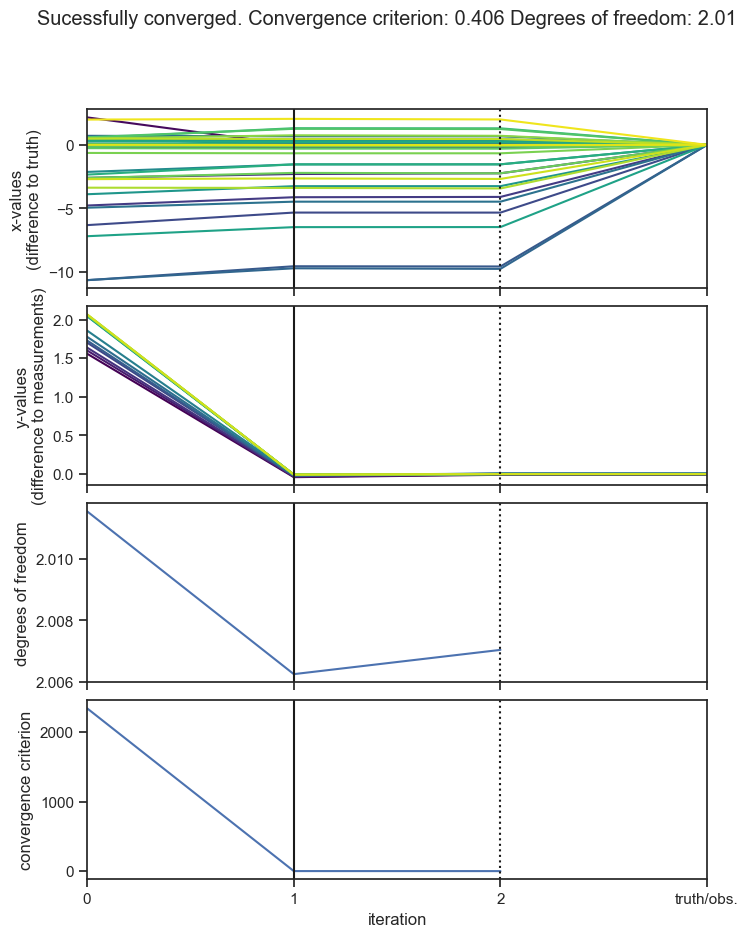

In [147]:
fig = oe_ref.plotIterations(legend=False, mode='difference')

In [148]:
oe_ref.x_op

00000_q      1.810907
00000_t    287.145612
00194_q      1.656361
00194_t    290.423834
00539_q      1.589513
00539_t    290.110367
01134_q      1.549412
01134_t    287.853715
01896_q      1.526896
01896_t    284.219483
02581_q      1.462229
02581_t    280.781899
03198_q      1.402208
03198_t    277.392646
03203_q      1.364866
03203_t    278.079640
03687_q      1.292871
03687_t    276.153614
04202_q      1.257989
04202_t    273.218418
04714_q      1.213517
04714_t    270.101224
05234_q      1.164502
05234_t    266.680930
05751_q      1.140414
05751_t    262.913907
06256_q      1.109913
06256_t    258.950422
06729_q      1.101937
06729_t    255.092106
07134_q      1.098894
07134_t    251.012022
07443_q      1.091800
07443_t    248.161589
07646_q      1.092254
07646_t    246.018214
07814_q      1.083432
07814_t    244.367265
07855_q      1.115417
07855_t    243.647564
dtype: float64

Text(0.5, 1.0, '$\\mathbf{S}_{op}$ Humidity')

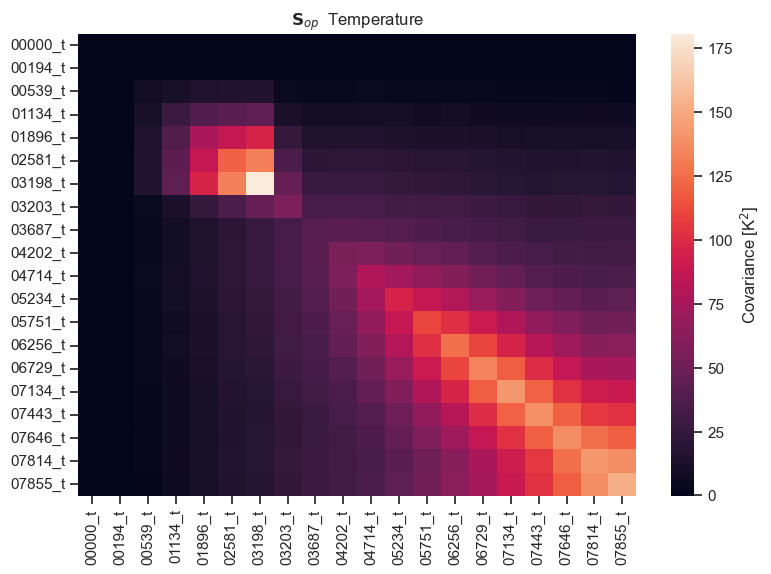

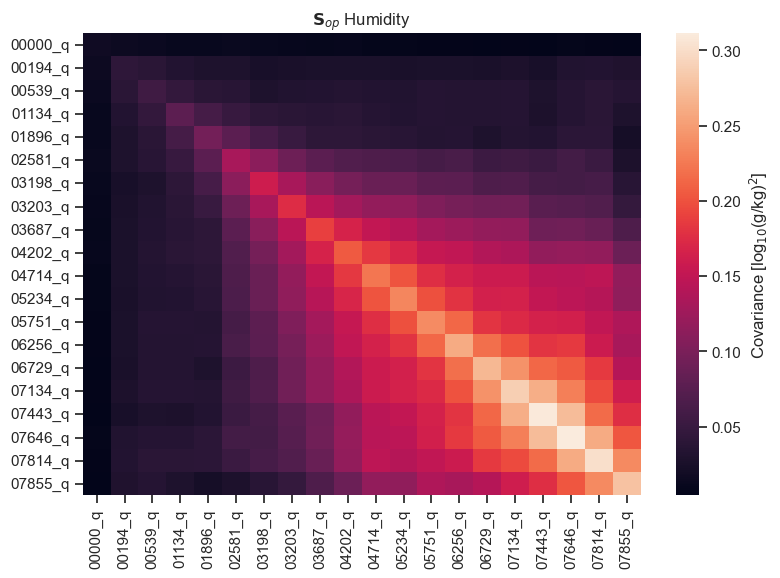

In [149]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(oe_ref.S_op .iloc[1::2, 1::2], ax=ax, cbar_kws={'label':'Covariance [K$^2$]'})
ax.set_title('$\mathbf{S}_{op}$  Temperature')

f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(oe_ref.S_op .iloc[::2, ::2], ax=ax, cbar_kws={'label':'Covariance [log$_{10}$(g/kg)$^2$]'})
ax.set_title('$\mathbf{S}_{op}$ Humidity')

In [150]:
oe_ref.x_op_err

00000_q     0.132116
00000_t     0.107788
00194_q     0.204218
00194_t     0.416999
00539_q     0.234313
00539_t     2.929936
01134_q     0.278729
01134_t     5.288743
01896_q     0.307833
01896_t     8.692227
02581_q     0.364050
02581_t    10.979194
03198_q     0.399493
03198_t    13.444813
03203_q     0.418015
03203_t     7.580865
03687_q     0.434411
03687_t     6.457811
04202_q     0.453538
04202_t     7.549982
04714_q     0.472466
04714_t     8.818530
05234_q     0.483320
05234_t     9.790461
05751_q     0.487183
05751_t    10.555322
06256_q     0.510045
06256_t    11.209983
06729_q     0.519083
06729_t    11.567224
07134_q     0.536083
07134_t    11.916266
07443_q     0.556437
07443_t    11.772480
07646_q     0.557969
07646_t    11.747299
07814_q     0.549114
07814_t    11.930286
07855_q     0.527063
07855_t    12.344942
dtype: float64

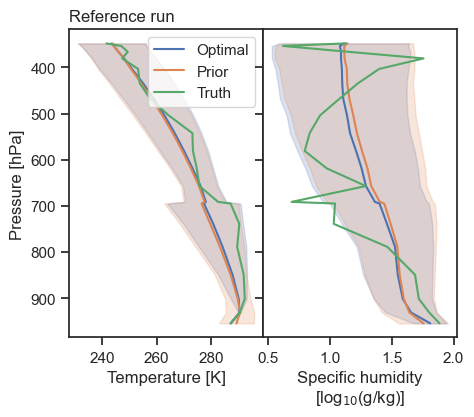

In [151]:
fig = supporting_routines.plotMwrResults(
    oe_ref,
    h=pressure.loc[season] / 100,
    hlabel='Pressure [hPa]',
    title='Reference run')

In [152]:
T_optimal, Q_optimal = supporting_routines.splitTQ(oe_ref.x_op)
T_truth, Q_truth = supporting_routines.splitTQ(oe_ref.x_truth)

print('RMS X Temperature: %g [K]'% np.sqrt(np.mean((T_optimal - T_truth)**2)))
print('RMS X Humidity: %g [log$_{10}$(g/kg)]'% np.sqrt(np.mean((10**Q_optimal - 10**Q_truth)**2)))
print('RMS Y %g [K]'% np.sqrt(np.mean((oe_ref.y_obs - oe_ref.y_op)**2)))

RMS X Temperature: 4.15902 [K]
RMS X Humidity: 14.5491 [log$_{10}$(g/kg)]
RMS Y 0.00403108 [K]


In [153]:
chiSquareTest = oe_ref.chiSquareTest(significance=0.05)

Warning. Singular Matrix with rank 13 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 2 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 4 instead of 40. (This is typically safe to ignore)       


In [154]:
print('\nTests passed:\n' ,chiSquareTest[0])


Tests passed:
 chi2test
Y_Optimal_vs_Observation    True
Y_Observation_vs_Prior      True
Y_Optimal_vs_Prior          True
X_Optimal_vs_Prior          True
dtype: bool


In [155]:
linearity, trueLinearityChi2, trueLinearityChi2Crit = oe_ref.linearityTest(significance=0.05)
print('Linearity test passed: ', trueLinearityChi2 < trueLinearityChi2Crit)

Linearity test passed:  True


In [156]:
x_a = x_mean.sel(season='DJF').to_pandas()  # as before
S_a = x_cov.sel(season='DJF')  # as before
S_a_diag = np.diag(np.diag(S_a))

In [157]:
oe_diag = pyOE.optimalEstimation(
    x_vars,
    x_a,
    S_a_diag,
    y_vars,
    y_obs,
    S_y,
    forwardRT,
    x_truth=x_truth,
    forwardKwArgs=forwardKwArgs,
)
oe_diag.doRetrieval()

0.41 s, iteration 1, degrees of freedom: 2.05 of 40, converged (x-space):  0.190
0.60 s, iteration 2, degrees of freedom: 2.05 of 40, done.  0.000


True

In [158]:
oe_diag.dgf, oe_ref.dgf

(2.050389560240337, 2.0070452798693204)

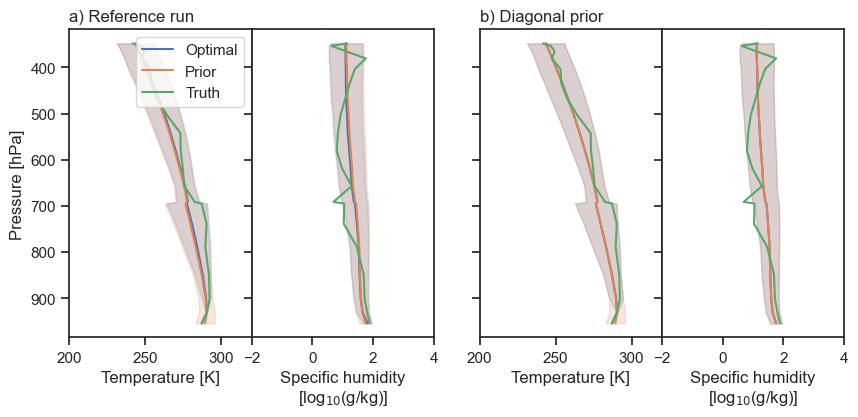

In [159]:
fig = supporting_routines.plotMwrResults(
    oe_ref,
    oe2 = oe_diag,
    h=pressure.loc[season] / 100,
    hlabel='Pressure [hPa]',
    title='a) Reference run',
    title2='b) Diagonal prior',
    xlimT = (200, 320),
    xlimH = (-2,4),
)


In [160]:
print('Reference run:')
supporting_routines.print_mwr_rms(oe_ref)
print('Diagonal prior:')
supporting_routines.print_mwr_rms(oe_diag)


Reference run:
RMS X Temperature: 4.15902 [K]
RMS X Humidity: 14.5491 [log$_{10}$(g/kg)]
RMS Y 0.00403108 [K]
Diagonal prior:
RMS X Temperature: 4.61934 [K]
RMS X Humidity: 15.4373 [log$_{10}$(g/kg)]
RMS Y 0.00539611 [K]


In [161]:
print(oe_diag.chiSquareTest()[0])

Warning. Singular Matrix with rank 13 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 3 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 4 instead of 40. (This is typically safe to ignore)       
chi2test
Y_Optimal_vs_Observation    True
Y_Observation_vs_Prior      True
Y_Optimal_vs_Prior          True
X_Optimal_vs_Prior          True
dtype: bool


In [162]:
linearity, trueLinearityChi2, trueLinearityChi2Crit = oe_diag.linearityTest(significance=0.05)
print('Linearity test passed: ', trueLinearityChi2 < trueLinearityChi2Crit)

Linearity test passed:  True


In [163]:
x_a = x_mean.sel(season='SON').to_pandas()
S_a = x_cov.sel(season='SON').to_pandas()
forwardKwArgs = dict(
    pressure=pressure.loc['SON'].values,
    zenithAngle=0,
    frequencies=frequencies
)

In [164]:
oe_sum = pyOE.optimalEstimation(
    x_vars,
    x_a,
    S_a,
    y_vars,
    y_obs,
    S_y,
    forwardRT,
    x_truth=x_truth,
    forwardKwArgs=forwardKwArgs,
)
oe_sum.doRetrieval()

0.42 s, iteration 1, degrees of freedom: 1.98 of 40, not converged (x-space):  13.587


0.61 s, iteration 2, degrees of freedom: 1.98 of 40, converged (x-space):  0.000
0.82 s, iteration 3, degrees of freedom: 1.98 of 40, done.  0.000


True

In [165]:
oe_ref.dgf, oe_sum.dgf

(2.0070452798693204, 1.98069061357969)

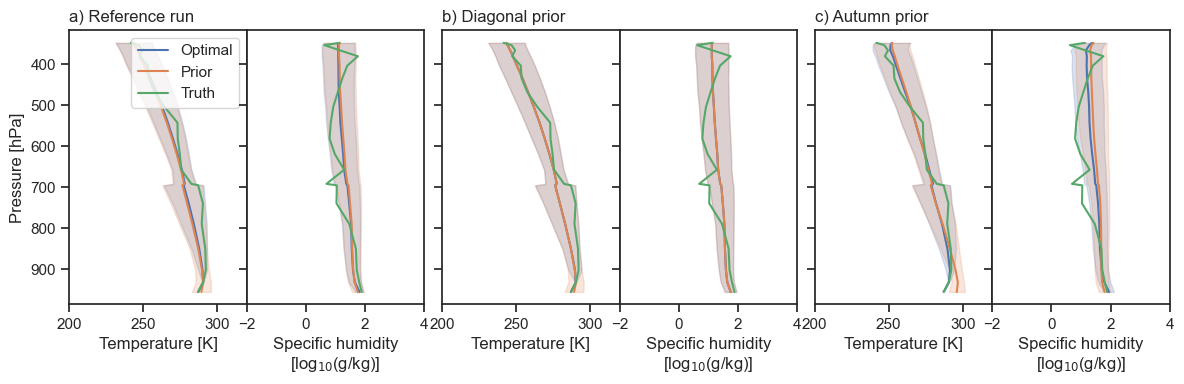

In [166]:
fig = supporting_routines.plotMwrResults(
    oe_ref,
    oe2 = oe_diag,
    oe3 = oe_sum,
    h=pressure.loc['DJF'] / 100,
    hlabel='Pressure [hPa]',
    title='a) Reference run',
    title2='b) Diagonal prior',
    title3='c) Autumn prior',
    xlimT = (200, 320),
    xlimH = (-2,4),
)
fig.tight_layout()
fig.savefig('Figure2.png', dpi=200)
fig.savefig('Figure2.pdf')

In [167]:
print('Reference run:')
supporting_routines.print_mwr_rms(oe_ref)
print('Autumn prior:')
supporting_routines.print_mwr_rms(oe_sum)

Reference run:
RMS X Temperature: 4.15902 [K]
RMS X Humidity: 14.5491 [log$_{10}$(g/kg)]
RMS Y 0.00403108 [K]
Autumn prior:
RMS X Temperature: 4.41491 [K]
RMS X Humidity: 15.925 [log$_{10}$(g/kg)]
RMS Y 0.00164736 [K]


In [168]:
print(oe_sum.chiSquareTest()[0])

Warning. Singular Matrix with rank 13 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 2 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 4 instead of 40. (This is typically safe to ignore)       
chi2test
Y_Optimal_vs_Observation    True
Y_Observation_vs_Prior      True
Y_Optimal_vs_Prior          True
X_Optimal_vs_Prior          True
dtype: bool


In [169]:
linearity, trueLinearityChi2, trueLinearityChi2Crit = oe_sum.linearityTest(significance=0.05)
print('Linearity test passed: ', trueLinearityChi2 < trueLinearityChi2Crit)

Linearity test passed:  True


In [170]:
S_b = pd.DataFrame(
    np.array([
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3, 0.3, 0.1, 0.0, 0.0, 0.0, 0.0],
        [0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 3.0, 3.3, 1.2, 0.1, 0.0, 0.0, 0.0],
        [0.3, 0.3, 0.4, 0.4, 0.4, 0.5, 0.7, 8.7, 9.2, 3.3, 0.3, 0.0, 0.0, 0.0],
        [0.3, 0.4, 0.4, 0.4, 0.5, 0.5, 0.7, 8.2, 8.7, 3.0, 0.3, 0.0, 0.0, 0.0],
        [0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.7, 0.7, 0.2, 0.0, 0.0, 0.0, 0.0],
        [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.5, 0.5, 0.2, 0.0, 0.0, 0.0, 0.0],
        [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.5, 0.4, 0.1, 0.0, 0.0, 0.0, 0.0],
        [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.4, 0.4, 0.1, 0.0, 0.0, 0.0, 0.0],
        [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.4, 0.4, 0.1, 0.0, 0.0, 0.0, 0.0],
        [0.2, 0.2, 0.1, 0.1, 0.1, 0.1, 0.1, 0.4, 0.3, 0.1, 0.0, 0.0, 0.0, 0.0],
        [0.2, 0.2, 0.1, 0.1, 0.1, 0.1, 0.1, 0.3, 0.3, 0.1, 0.0, 0.0, 0.0, 0.0],
    ]),
    index=frequencies[::-1],
    columns=frequencies)

Text(0.5, 1.0, "Model uncertainty $\\mathbf{S}_{b}$' (Cimini et al. 2018)")

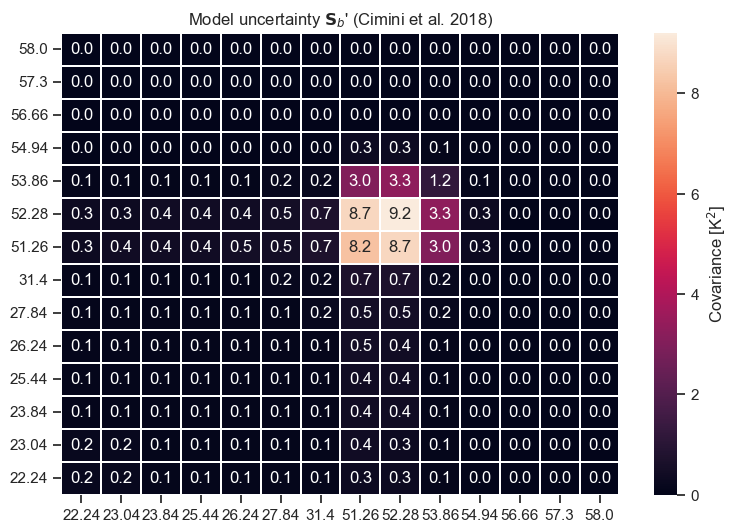

In [171]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(
    S_b, 
    annot=True, 
    linewidths=.05, 
    ax=ax, 
    fmt='.1f', 
    cbar_kws={'label':'Covariance [K$^2$]'}
)
ax.set_title(r"Model uncertainty $\mathbf{S}_{b}$' (Cimini et al. 2018)")

In [172]:
x_a = x_mean.sel(season='DJF').to_pandas() # as for the reference run
S_a = x_cov.sel(season='DJF').to_pandas() # as for the reference run
S_e = S_y + S_b

assert (S_e.values == S_e.values.T).all()

forwardKwArgs = dict(
    pressure=pressure.loc['DJF'].values,
    zenithAngle=0,
    frequencies=frequencies
)

oe_b = pyOE.optimalEstimation(
    x_vars,
    x_a,
    S_a,
    y_vars,
    y_obs,
    S_e,
    forwardRT,
    x_truth=x_truth,
    forwardKwArgs=forwardKwArgs,
)
oe_b.doRetrieval()

0.39 s, iteration 1, degrees of freedom: 1.86 of 40, converged (x-space):  0.012
0.59 s, iteration 2, degrees of freedom: 1.86 of 40, done.  0.000


True

In [173]:
oe_ref.dgf, oe_b.dgf

(2.0070452798693204, 1.8567378152341494)

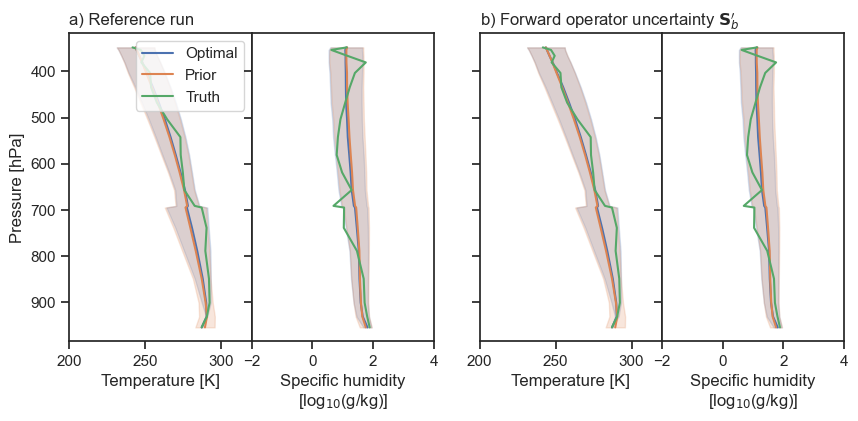

In [174]:
fig = supporting_routines.plotMwrResults(
    oe_ref,
    oe2 = oe_b,
    h=pressure.loc['DJF'] / 100,
    hlabel='Pressure [hPa]',
    title='a) Reference run',
    title2="b) Forward operator uncertainty $\mathbf{S}_b'$",
    xlimT = (200, 320),
    xlimH = (-2,4),
)

In [175]:
print('Reference run:')
supporting_routines.print_mwr_rms(oe_ref)
print('Concidering forward model error:')
supporting_routines.print_mwr_rms(oe_b)


Reference run:
RMS X Temperature: 4.15902 [K]
RMS X Humidity: 14.5491 [log$_{10}$(g/kg)]
RMS Y 0.00403108 [K]
Concidering forward model error:
RMS X Temperature: 4.22633 [K]
RMS X Humidity: 14.5659 [log$_{10}$(g/kg)]
RMS Y 0.0230224 [K]


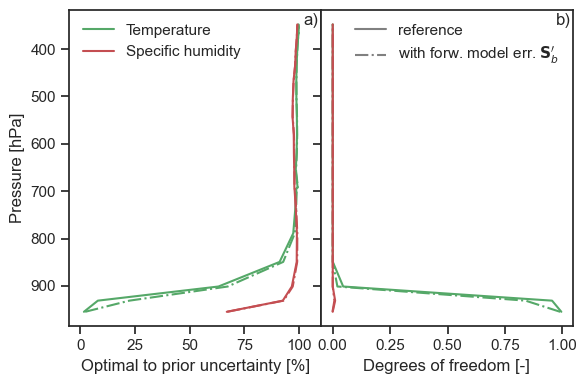

In [176]:
fig = supporting_routines.plot_uncertainty_dof(
    oe_ref, oe_b, 'with forw. model err. $\mathbf{S}_b\'$',
    pressure.loc['DJF'] / 100,
)
fig.tight_layout()
fig.subplots_adjust(wspace=0)
fig.savefig('Figure3.png', dpi=200)
fig.savefig('Figure3.pdf')

In [177]:
((oe_b.x_op_err/oe_b.x_a_err) - (oe_ref.x_op_err/oe_ref.x_a_err)).max() * 100

14.4052453653707

In [178]:
print('Change in degrees of freedom for temperature variables %g' %
      (supporting_routines.splitTQ(oe_ref.dgf_x)[0].sum() -
       supporting_routines.splitTQ(oe_b.dgf_x)[0].sum()))
print('Change in degrees of freedom for humidity variables %g' %
      (supporting_routines.splitTQ(oe_ref.dgf_x)[1].sum() -
       supporting_routines.splitTQ(oe_b.dgf_x)[1].sum()))

Change in degrees of freedom for temperature variables 0.14589
Change in degrees of freedom for humidity variables 0.00441742


In [179]:
print(oe_b.chiSquareTest()[0])
linearity, trueLinearityChi2, trueLinearityChi2Crit = oe_ref.linearityTest(significance=0.05)
print('Linearity test passed: ', trueLinearityChi2 < trueLinearityChi2Crit)

Warning. Singular Matrix with rank 13 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 2 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 4 instead of 40. (This is typically safe to ignore)       
chi2test
Y_Optimal_vs_Observation    True
Y_Observation_vs_Prior      True
Y_Optimal_vs_Prior          True
X_Optimal_vs_Prior          True
dtype: bool
Linearity test passed:  True


In [180]:
x_a = x_mean.sel(season='DJF').to_pandas() # as reference
S_a = x_cov.sel(season='DJF').to_pandas() # as reference
S_e = S_y * 4
forwardKwArgs = dict(
    pressure=pressure.loc['DJF'].values,
    zenithAngle=0,
    frequencies=frequencies
)

oe_double = pyOE.optimalEstimation(
    x_vars,
    x_a,
    S_a,
    y_vars,
    y_obs,
    S_e,
    forwardRT,
    x_truth=x_truth,
    forwardKwArgs=forwardKwArgs,
)
oe_double.doRetrieval()

0.38 s, iteration 1, degrees of freedom: 1.94 of 40, converged (x-space):  0.094
0.57 s, iteration 2, degrees of freedom: 1.94 of 40, done.  0.000


True

In [181]:
S_e = S_y / 4

oe_half = pyOE.optimalEstimation(
    x_vars,
    x_a,
    S_a,
    y_vars,
    y_obs,
    S_e,
    forwardRT,
    x_truth=x_truth,
    forwardKwArgs=forwardKwArgs,
)
oe_half.doRetrieval()

0.39 s, iteration 1, degrees of freedom: 2.07 of 40, converged (x-space):  1.731
0.57 s, iteration 2, degrees of freedom: 2.08 of 40, done.  0.000


True

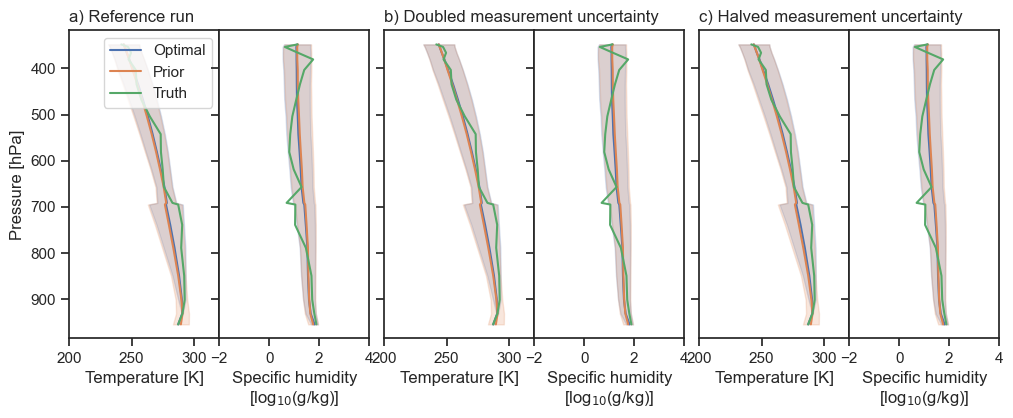

In [182]:
fig = supporting_routines.plotMwrResults(
    oe_ref,
    oe2 = oe_double,
    oe3 = oe_half,
    h=pressure.loc[season] / 100,
    hlabel='Pressure [hPa]',
    title='a) Reference run',
    title2='b) Doubled measurement uncertainty',
    title3='c) Halved measurement uncertainty',
    xlimT = (200, 320),
    xlimH = (-2, 4),
)

In [183]:
print('### Reference run ###')
T_optimal, Q_optimal = supporting_routines.splitTQ(oe_ref.x_op)
T_truth, Q_truth = supporting_routines.splitTQ(oe_ref.x_a)
print('Temperature RMS difference to x_a: %g [K]'% np.sqrt(np.mean((T_optimal - T_truth)**2)))
print('Humidity RMS difference to x_a: %g [log10(g/kg)]'% np.sqrt(np.mean((10**Q_optimal - 10**Q_truth)**2)))

print('\n### Doubled measurement uncertainty ###')
T_optimal, Q_optimal = supporting_routines.splitTQ(oe_double.x_op)
T_truth, Q_truth = supporting_routines.splitTQ(oe_double.x_a)
print('Temperature RMS difference to x_a: %g [K]'% np.sqrt(np.mean((T_optimal - T_truth)**2)))
print('Humidity RMS difference to x_a: %g [log10(g/kg)]'% np.sqrt(np.mean((10**Q_optimal - 10**Q_truth)**2)))

print('\n### Halved measurement uncertainty ###')
T_optimal, Q_optimal = supporting_routines.splitTQ(oe_half.x_op)
T_truth, Q_truth = supporting_routines.splitTQ(oe_half.x_a)
print('Temperature RMS difference to x_a: %g [K]'% np.sqrt(np.mean((T_optimal - T_truth)**2)))
print('Humidity RMS difference to x_a: %g [log10(g/kg)]'% np.sqrt(np.mean((10**Q_optimal - 10**Q_truth)**2)))


### Reference run ###
Temperature RMS difference to x_a: 0.771926 [K]
Humidity RMS difference to x_a: 2.30943 [log10(g/kg)]

### Doubled measurement uncertainty ###
Temperature RMS difference to x_a: 0.735703 [K]
Humidity RMS difference to x_a: 2.29146 [log10(g/kg)]

### Halved measurement uncertainty ###
Temperature RMS difference to x_a: 0.858466 [K]
Humidity RMS difference to x_a: 2.32848 [log10(g/kg)]


Change in degrees of freedom for halved measurement uncertainties -0.068287
Change in degrees of freedom for doubled measurement uncertainties 0.071557


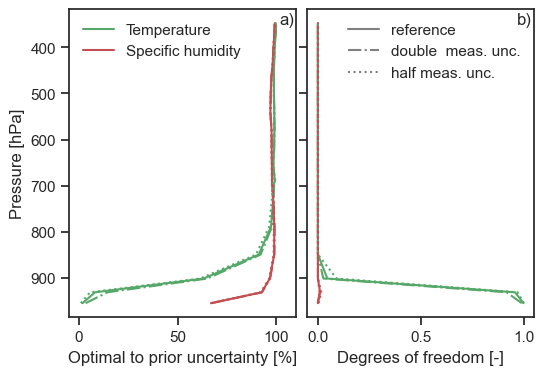

In [184]:
fig = supporting_routines.plot_uncertainty_dof(
    oe_ref, oe_double, 'double  meas. unc.',
    pressure.loc['DJF'] / 100,
    oe3=oe_half, label3 = 'half meas. unc.'
)

print('Change in degrees of freedom for halved measurement uncertainties %g' %
      (oe_ref.dgf - oe_half.dgf))
print('Change in degrees of freedom for doubled measurement uncertainties %g' %
      (oe_ref.dgf - oe_double.dgf))


In [185]:
print(oe_double.chiSquareTest()[0])
linearity, trueLinearityChi2, trueLinearityChi2Crit = oe_double.linearityTest(significance=0.05)
print('Linearity test passed: ', trueLinearityChi2 < trueLinearityChi2Crit)

Warning. Singular Matrix with rank 13 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 2 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 4 instead of 40. (This is typically safe to ignore)       
chi2test
Y_Optimal_vs_Observation    True
Y_Observation_vs_Prior      True
Y_Optimal_vs_Prior          True
X_Optimal_vs_Prior          True
dtype: bool
Linearity test passed:  True


In [186]:
print(oe_half.chiSquareTest()[0])
linearity, trueLinearityChi2, trueLinearityChi2Crit = oe_half.linearityTest(significance=0.05)
print('Linearity test passed: ', trueLinearityChi2 < trueLinearityChi2Crit)

Warning. Singular Matrix with rank 13 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 3 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 4 instead of 40. (This is typically safe to ignore)       
chi2test
Y_Optimal_vs_Observation    True
Y_Observation_vs_Prior      True
Y_Optimal_vs_Prior          True
X_Optimal_vs_Prior          True
dtype: bool
Linearity test passed:  True


Text(0.5, 1.0, 'Measurement uncertainty $\\mathbf{S}_{y}$ including non-diagonal elements.')

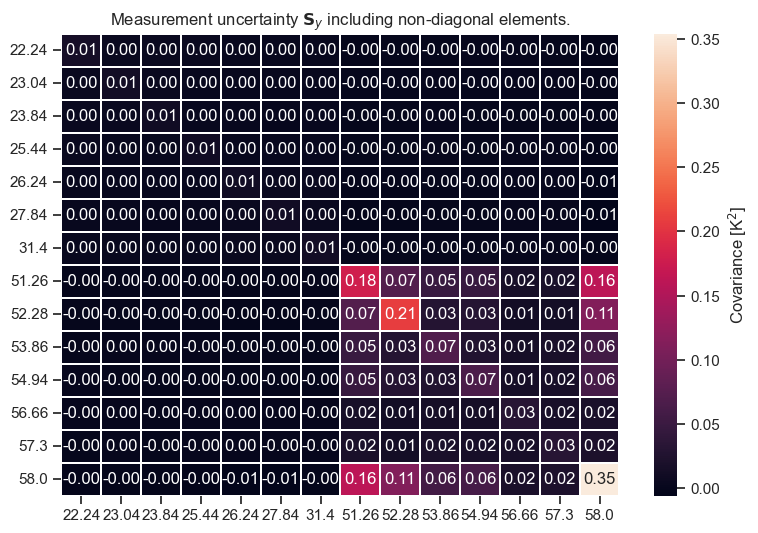

In [187]:
S_y_nondiag = np.array(
    [[
        1.4464e-02, 3.1175e-03, 3.2584e-03, 2.7590e-03, 2.1494e-03, 1.8121e-03,
        2.3444e-03, -2.8253e-03, -1.1941e-03, -7.1487e-04, -7.1019e-05,
        -1.3676e-04, -3.0526e-04, -3.8639e-03
    ],
     [
         3.1175e-03, 1.1803e-02, 2.5663e-03, 2.1457e-03, 1.5946e-03,
         1.6916e-03, 1.8975e-03, -7.3124e-04, -4.7555e-04, 1.8126e-04,
         -8.1855e-04, 4.6114e-04, 3.1963e-06, -2.5867e-03
     ],
     [
         3.2584e-03, 2.5663e-03, 1.0841e-02, 2.3239e-03, 1.1311e-03,
         1.1062e-03, 1.5767e-03, -6.4790e-04, -1.3201e-03, 1.7669e-04,
         -1.0165e-03, -4.5220e-04, -5.8443e-04, -1.9019e-03
     ],
     [
         2.7590e-03, 2.1457e-03, 2.3239e-03, 8.4360e-03, 1.3579e-03,
         1.5264e-03, 1.4780e-03, -8.7548e-04, -1.5626e-03, -1.7332e-04,
         -4.6437e-04, -1.8432e-04, -1.7265e-04, -3.8433e-03
     ],
     [
         2.1494e-03, 1.5946e-03, 1.1311e-03, 1.3579e-03, 1.0352e-02,
         3.3218e-03, 3.1755e-03, -2.2734e-03, -2.3389e-03, -1.2198e-03,
         -7.2950e-04, 2.0710e-04, 2.5822e-04, -5.9091e-03
     ],
     [
         1.8121e-03, 1.6916e-03, 1.1062e-03, 1.5264e-03, 3.3218e-03,
         1.0172e-02, 3.2801e-03, -2.0768e-03, -2.1563e-03, -4.6483e-04,
         -1.6465e-03, 9.4358e-05, -2.8649e-04, -5.4612e-03
     ],
     [
         2.3444e-03, 1.8975e-03, 1.5767e-03, 1.4780e-03, 3.1755e-03,
         3.2801e-03, 1.1026e-02, -3.1658e-04, -1.1692e-03, -7.5206e-04,
         -1.0920e-03, -3.7627e-05, -2.0978e-04, -1.7690e-03
     ],
     [
         -2.8253e-03, -7.3124e-04, -6.4790e-04, -8.7548e-04, -2.2734e-03,
         -2.0768e-03, -3.1658e-04, 1.7896e-01, 7.2248e-02, 4.8262e-02,
         4.6481e-02, 1.6283e-02, 1.8456e-02, 1.6027e-01
     ],
     [
         -1.1941e-03, -4.7555e-04, -1.3201e-03, -1.5626e-03, -2.3389e-03,
         -2.1563e-03, -1.1692e-03, 7.2248e-02, 2.0847e-01, 2.8595e-02,
         2.9832e-02, 1.1226e-02, 1.3614e-02, 1.1240e-01
     ],
     [
         -7.1487e-04, 1.8126e-04, 1.7669e-04, -1.7332e-04, -1.2198e-03,
         -4.6483e-04, -7.5206e-04, 4.8262e-02, 2.8595e-02, 6.9126e-02,
         2.5361e-02, 1.3994e-02, 1.8141e-02, 5.6810e-02
     ],
     [
         -7.1019e-05, -8.1855e-04, -1.0165e-03, -4.6437e-04, -7.2950e-04,
         -1.6465e-03, -1.0920e-03, 4.6481e-02, 2.9832e-02, 2.5361e-02,
         6.5223e-02, 1.3962e-02, 1.6982e-02, 6.0963e-02
     ],
     [
         -1.3676e-04, 4.6114e-04, -4.5220e-04, -1.8432e-04, 2.0710e-04,
         9.4358e-05, -3.7627e-05, 1.6283e-02, 1.1226e-02, 1.3994e-02,
         1.3962e-02, 3.1456e-02, 1.7948e-02, 1.8197e-02
     ],
     [
         -3.0526e-04, 3.1963e-06, -5.8443e-04, -1.7265e-04, 2.5822e-04,
         -2.8649e-04, -2.0978e-04, 1.8456e-02, 1.3614e-02, 1.8141e-02,
         1.6982e-02, 1.7948e-02, 3.0822e-02, 2.1850e-02
     ],
     [
         -3.8639e-03, -2.5867e-03, -1.9019e-03, -3.8433e-03, -5.9091e-03,
         -5.4612e-03, -1.7690e-03, 1.6027e-01, 1.1240e-01, 5.6810e-02,
         6.0963e-02, 1.8197e-02, 2.1850e-02, 3.5390e-01
     ]])

S_y_nondiag = pd.DataFrame(
    S_y_nondiag,
    index=y_vars,
    columns=y_vars,
)
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(S_y_nondiag, annot=True, fmt='.2f', ax=ax, linewidths=.05, cbar_kws={'label':'Covariance [K$^2$]'})

ax.set_title(r'Measurement uncertainty $\mathbf{S}_{y}$ including non-diagonal elements.')



In [188]:
x_a = x_mean.sel(season='DJF').to_pandas()[x_vars] # as reference run
S_a = x_cov.sel(season='DJF').to_pandas().loc[x_vars, x_vars] # as reference run
S_e = S_y_nondiag

forwardKwArgs = dict(
    pressure=pressure.loc['DJF'].values,
    zenithAngle=0,
    frequencies=frequencies
)

oe_nondiag = pyOE.optimalEstimation(
    x_vars,
    x_a,
    S_a,
    y_vars,
    y_obs,
    S_e,
    forwardRT,
    x_truth=x_truth,
    forwardKwArgs=forwardKwArgs,
)
oe_nondiag.doRetrieval()

0.41 s, iteration 1, degrees of freedom: 1.99 of 40, converged (x-space):  0.195
0.60 s, iteration 2, degrees of freedom: 1.99 of 40, done.  0.000


True

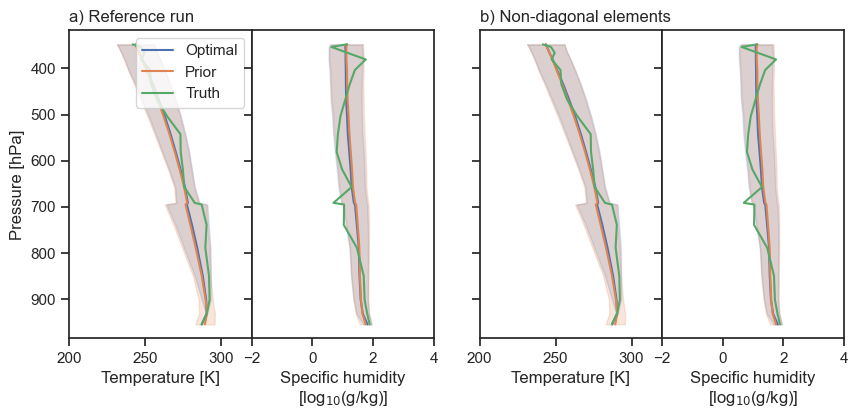

In [189]:
fig = supporting_routines.plotMwrResults(
    oe_ref,
    oe2 = oe_nondiag,
    h=pressure.loc[season] / 100,
    hlabel='Pressure [hPa]',
    title='a) Reference run',
    title2='b) Non-diagonal elements',
    xlimT = (200, 320),
    xlimH = (-2,4),
)

In [190]:
oe_nondiag.dgf - oe_ref.dgf

-0.017965309938099194

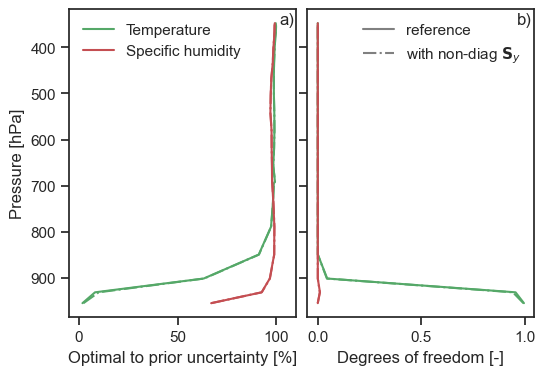

In [191]:
fig = supporting_routines.plot_uncertainty_dof(
    oe_ref, oe_nondiag, 'with non-diag $\mathbf{S}_y$',
    pressure.loc['DJF'] / 100,
)

In [192]:
print(oe_nondiag.chiSquareTest()[0])
linearity, trueLinearityChi2, trueLinearityChi2Crit = oe_nondiag.linearityTest(significance=0.05)
print('Linearity test passed: ', trueLinearityChi2 < trueLinearityChi2Crit)

Warning. Singular Matrix with rank 13 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 2 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 4 instead of 40. (This is typically safe to ignore)       
chi2test
Y_Optimal_vs_Observation    True
Y_Observation_vs_Prior      True
Y_Optimal_vs_Prior          True
X_Optimal_vs_Prior          True
dtype: bool
Linearity test passed:  True


In [194]:
x_a = x_mean.sel(season='DJF').to_pandas()  # as reference run
S_a = x_cov.sel(season='DJF').to_pandas()   # as reference run

In [195]:
oe_testy = pyOE.optimalEstimation(
    x_vars,
    x_a,
    S_a,
    y_vars,
    y_obs,
    S_y,
    forwardRT,
    x_truth=x_truth,
    forwardKwArgs=forwardKwArgs,
    convergenceTest='y'
)
oe_testy.doRetrieval()

0.40 s, iteration 1, degrees of freedom: 2.00 of 40, not converged (y-space):  9848.957
0.60 s, iteration 2, degrees of freedom: 2.00 of 40, converged (y-space):  0.052
0.82 s, iteration 3, degrees of freedom: 2.00 of 40, done.  0.000


True

In [196]:
oe_testy.dgf, oe_ref.dgf

(2.0031348083602833, 2.0070452798693204)

In [197]:
print('Reference run with test in x-space:')
supporting_routines.print_mwr_rms(oe_ref)
print('Test in y-space:')
supporting_routines.print_mwr_rms(oe_testy)


Reference run with test in x-space:
RMS X Temperature: 4.15902 [K]
RMS X Humidity: 14.5491 [log$_{10}$(g/kg)]
RMS Y 0.00403108 [K]
Test in y-space:
RMS X Temperature: 4.15922 [K]
RMS X Humidity: 14.5512 [log$_{10}$(g/kg)]
RMS Y 0.00369241 [K]


In [198]:
print(oe_testy.chiSquareTest()[0])

Warning. Singular Matrix with rank 13 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 2 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 4 instead of 40. (This is typically safe to ignore)       
chi2test
Y_Optimal_vs_Observation    True
Y_Observation_vs_Prior      True
Y_Optimal_vs_Prior          True
X_Optimal_vs_Prior          True
dtype: bool


In [199]:
linearity, trueLinearityChi2, trueLinearityChi2Crit = oe_testy.linearityTest(significance=0.05)
print('Linearity test passed: ', trueLinearityChi2 < trueLinearityChi2Crit)

Linearity test passed:  True
